<h1><center> Assignment: 01<br>Document Distance</h1></center>
<h4><right>*Name: Raja Hasnain Anwar*<br/><br/>
*Registration: 192135*</right></h4>

### Specs:

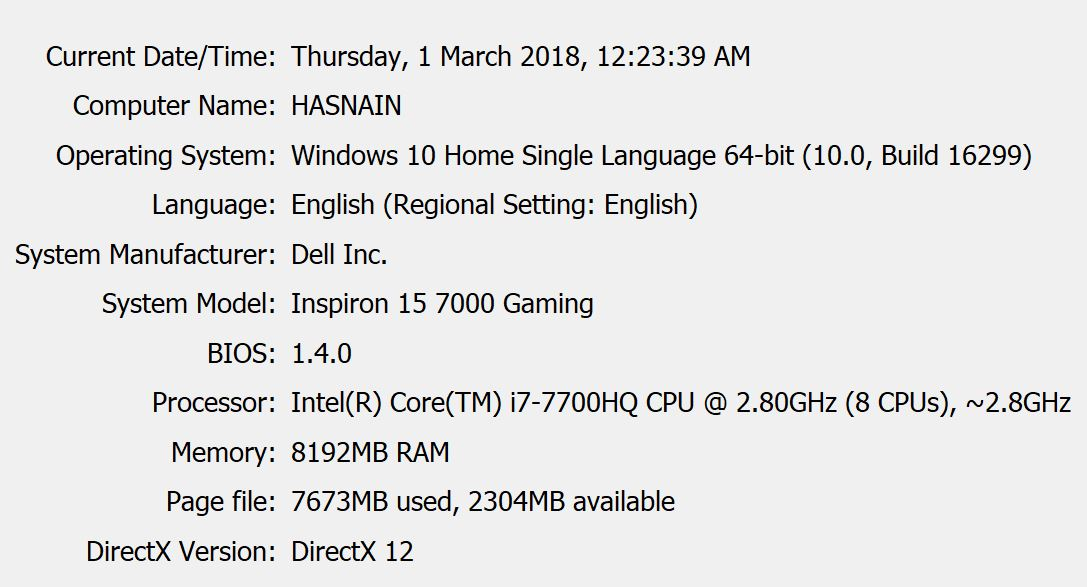

In [1]:
from IPython.display import Image
Image(filename='Capture.JPG')

## Code
The Python code for Document Distance problem is given below.

Importing required libraries

In [2]:
import time
import math

### Utility Functions

A function to read the file, clean it, and return the word frequency map.

In [3]:
def tokenize(filename):
    with open(filename,'r') as doc: # open file
        '''As the readlines() return an array,
        join() converts it into a string.'''
        text = str(''.join(doc.readlines())) # read its text;

    '''str.maketrans() will make a translation table to replace extra characters to spaces'''
    text = text.translate(str.maketrans(",.'-/?&\\\":"," "*10)).lower() # lower case to easily match
    tokens = text.split()
    hits = dict()
    for val in tokens:
        try:
            hits[val] += 1
        except:
            hits[val] = 1
    return hits, len(tokens)

A function to calculate the *norm* of the given function.

In [4]:
def norm(hits):
    sum2 = 0
    for key, value in hits.items():
        sum2 += value**2
    return math.sqrt(sum2)

Function to calculate the dot product.

In [5]:
def dot(first, second):
    sum1 = 0
    for key, value in first.items():
        if key in second.keys():
            sum1 += (value * second[key])
    return sum1

### Test input

In [6]:
# get word frequecies in both files
first, a = tokenize('testa.txt')
second, b = tokenize('testb.txt')
size = a + b # total input size

print("Input size:", size)
firstn = norm(first) # ||first||
secondn = norm(second) # ||second||

cos = dot(first, second) / (firstn * secondn) # first . second / (||first|| ||seocnd||)
print(math.acos(round(cos,5))) # angle in radians

Input size: 18
0.44052012285288084


## Behavior

In [7]:
sizes = [] # size of each input
times = [] # time taken for each input

for i in range(1,9): # eight sets of files available
    start = time.clock() # start timer
    # open files
    first, a = tokenize(str(i)+'a.txt')
    second, b = tokenize(str(i)+'b.txt')
    
    sizes.append(a+b)
    
    firstn = norm(first) # ||first||
    secondn = norm(second) # ||second||

    cos = dot(first, second) / (firstn * secondn) # first . second / (||first|| ||seocnd||)
    similarity = math.acos(round(cos,5)) # similarity angle
    # record time
    times.append(time.clock() - start)
    
    print('File set:',i)
    print('Similarity angle:', round(similarity,3),'rad OR', round(math.degrees(similarity),3), 'deg')
    print('Size:', sizes[i-1])
    print('Time taken:', times[i-1], 'sec')
    print()

File set: 1
Similarity angle: 0.615 rad OR 35.264 deg
Size: 5
Time taken: 0.0006031679811887441 sec

File set: 2
Similarity angle: 0.896 rad OR 51.318 deg
Size: 16
Time taken: 0.0011326721581452477 sec

File set: 3
Similarity angle: 1.085 rad OR 62.188 deg
Size: 82
Time taken: 0.000579099609508903 sec

File set: 4
Similarity angle: 1.063 rad OR 60.923 deg
Size: 233
Time taken: 0.0007938915931365756 sec

File set: 5
Similarity angle: 1.494 rad OR 85.594 deg
Size: 399
Time taken: 0.000726791890271564 sec

File set: 6
Similarity angle: 1.558 rad OR 89.239 deg
Size: 600
Time taken: 0.0011713274217522657 sec

File set: 7
Similarity angle: 0.731 rad OR 41.887 deg
Size: 758
Time taken: 0.0023648998536934746 sec

File set: 8
Similarity angle: 0.385 rad OR 22.078 deg
Size: 2526
Time taken: 0.0052862896344087265 sec



Text file...

In [8]:
with open('results.txt', 'w') as out:
    out.write('size, time\n')
    for i in range(len(sizes)):
        out.write('%d, %f\n' % (sizes[i], times[i]))

## Plot

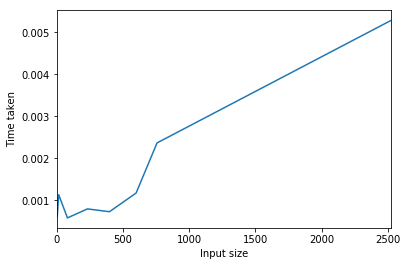

In [10]:
import matplotlib.pyplot as plt

plt.plot(sizes, times)
plt.xlim([0, max(sizes)])
plt.xlabel('Input size')
plt.ylabel('Time taken')
plt.show()

The algorithm shows somewhat **linear ~ log-linear** behaviour with fluctuation with small inputs.

# References
* [Random Text Generator](http://randomtextgenerator.com/)
* [Dummy Text Generator](http://www.blindtextgenerator.com)
* [Long Fomr](https://longform.org/random)